In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
def Softmax(x):
    x = np.subtract(x, np.max(x))
    ex = np.exp(x)

    return ex / np.sum(ex)

In [3]:
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1]]
X[:, :, 2] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X[:, :, 3] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0]]
X[:, :, 4] = [[1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]



In [4]:
D = np.array([
    [[1,0,0,0,0]],
    [[0,1,0,0,0]],
    [[0,0,1,0,0]],
    [[0,0,0,1,0]],
    [[0,0,0,0,1]]
])

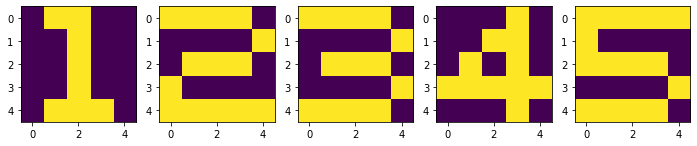

In [5]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])
plt.show()

In [6]:
def ReLU(x):
    return np.maximum(0, x)

In [7]:
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, v1, v2, v3, y1, y2, y3
    

In [8]:
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1

    return delta, delta1, delta2, delta3

In [9]:
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4

    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3

    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2

    dW1 = alpha * delta1*x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

In [10]:
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:,:,k], (25, 1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

    return W1, W2, W3, W4

In [11]:
W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01

for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [12]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y

In [13]:
N = 5

In [14]:
for k in range(N):
    x = np.reshape(X[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    print(f'Y = {k + 1}')
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('----------')

Y = 1
[1]
[[9.99986108e-01]
 [7.27893807e-06]
 [6.16414207e-08]
 [6.53555197e-06]
 [1.59061856e-08]]
----------
Y = 2
[2]
[[6.69053773e-14]
 [9.99965918e-01]
 [3.40815773e-05]
 [1.18949973e-15]
 [1.93660844e-17]]
----------
Y = 3
[3]
[[4.40941929e-09]
 [5.42106163e-05]
 [9.99930627e-01]
 [1.61832521e-09]
 [1.51567171e-05]]
----------
Y = 4
[4]
[[1.21380417e-06]
 [2.91449540e-09]
 [6.04756031e-07]
 [9.99984696e-01]
 [1.34820468e-05]]
----------
Y = 5
[5]
[[7.16768198e-12]
 [8.21990246e-11]
 [2.09875510e-05]
 [8.86554759e-06]
 [9.99970147e-01]]
----------


In [15]:
X_test = np.zeros((5, 5, 5))

X_test[:, :, 0] = [[0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X_test[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X_test[:, :, 2] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0]]
X_test[:, :, 3] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,0,0,0]]
X_test[:, :, 4] = [[0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0]]

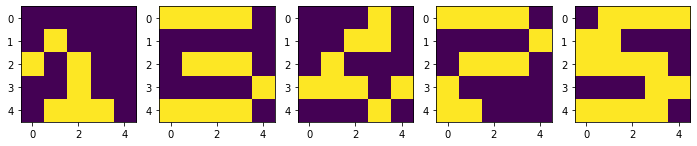

In [16]:
plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X_test[:, :, n])
plt.show()

In [17]:
learning_result = [0,0,0,0,0]
for k in range(N):
    x = np.reshape(X_test[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis=0) + 1
    print(f'Y = {k + 1}')
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('----------')

Y = 1
[4]
[[1.15922426e-01]
 [2.77959416e-05]
 [1.00660695e-02]
 [8.73961208e-01]
 [2.24998172e-05]]
----------
Y = 2
[3]
[[1.38860858e-07]
 [2.20002246e-03]
 [9.97726190e-01]
 [2.19708003e-08]
 [7.36265698e-05]]
----------
Y = 3
[4]
[[9.06575015e-10]
 [5.68749557e-10]
 [1.04084989e-05]
 [9.99988391e-01]
 [1.19879898e-06]]
----------
Y = 4
[3]
[[1.18518173e-06]
 [1.00634299e-02]
 [9.89884568e-01]
 [1.82808602e-06]
 [4.89891566e-05]]
----------
Y = 5
[5]
[[4.09346261e-13]
 [1.95810746e-12]
 [6.07260265e-04]
 [2.36146935e-03]
 [9.97031270e-01]]
----------


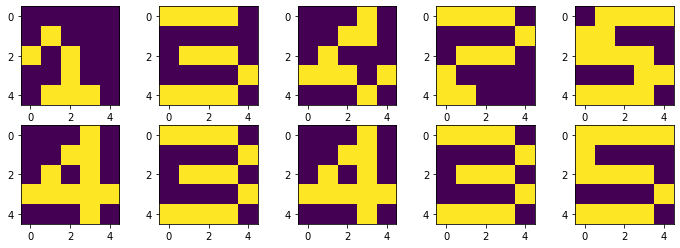

In [19]:
plt.figure(figsize=(12, 4))
for k in range(5):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k])
    plt.subplot(2, 5, k+6)
    plt.imshow(X[:,:,learning_result[k][0] -1])
plt.show()

In [23]:
y = np.array([0.1, 0.2, 0.5, 0.8, 0.6, 0.4, 0.3, 1, 2, 3, 4])
y.size * (1-0.8)


2.1999999999999993

In [24]:
num = round(y.size * (1-0.8))
np.random.choice(y.size, num)

array([1, 4])

In [25]:
def Dropout(y, ratio):
    ym = np.zeros_like(y)

    num = round(y.size*(1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    ym[idx] = 1.0 / (1.0 - ratio)

    return ym

In [26]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [27]:
def calcOutput_Dropout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)

    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y2 = y2 * Dropout(y2, 0.2)

    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)

    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, v1, v2, v3, y1, y2, y3

In [ ]:
def backpropagation_Dropout(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = 

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1

    return delta, delta1, delta2, delta3